# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [57]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [58]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

print(url)

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        #print(city_url + city)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

http://api.openweathermap.org/data/2.5/weather?
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | weno
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | newala kisimani
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | gubkinskiy
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | longyearbyen
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | tazovsky
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | chui
Processing Record 19 of Set 1 | khair
Processing Record 20 of Set 1 | aoulef
Processing Record 21 of Set 1 | guaitarilla


In [59]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [60]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,16.49,75,66,1.80,ZA,1704670502
1,weno,7.4515,151.8468,28.35,69,89,9.35,FM,1704670502
2,ushuaia,-54.8000,-68.3000,9.81,53,40,7.72,AR,1704670166
3,newala kisimani,-10.9500,39.2833,20.80,90,100,1.22,TZ,1704670503
4,west island,-12.1568,96.8225,26.99,83,75,7.20,CC,1704670503


In [61]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [62]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,16.49,75,66,1.80,ZA,1704670502
1,weno,7.4515,151.8468,28.35,69,89,9.35,FM,1704670502
2,ushuaia,-54.8000,-68.3000,9.81,53,40,7.72,AR,1704670166
3,newala kisimani,-10.9500,39.2833,20.80,90,100,1.22,TZ,1704670503
4,west island,-12.1568,96.8225,26.99,83,75,7.20,CC,1704670503


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

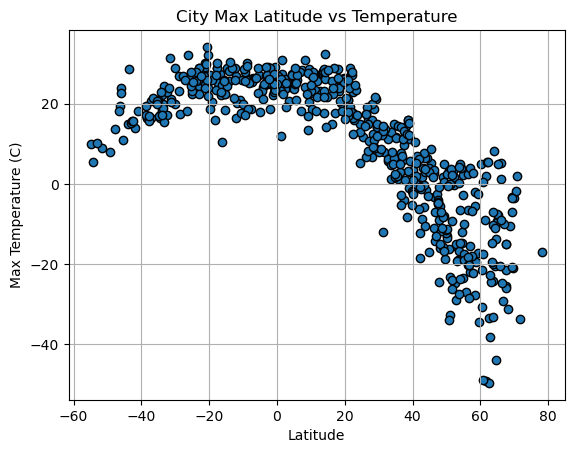

In [66]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

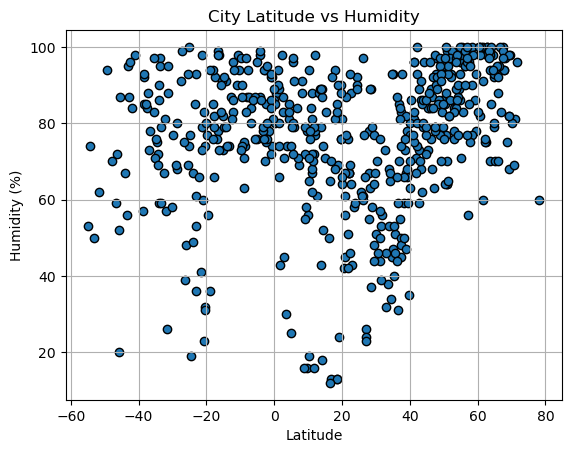

In [67]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

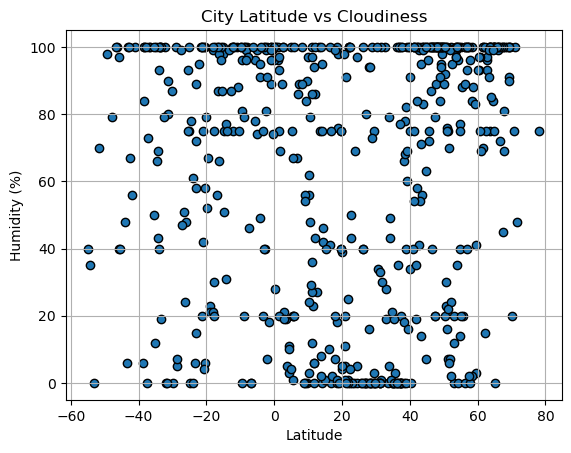

In [68]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

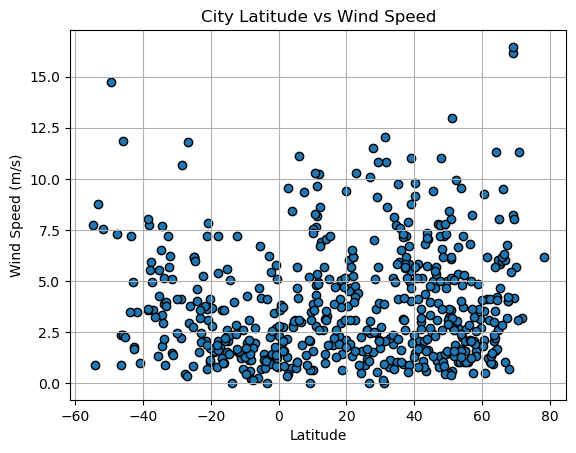

In [69]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,weno,7.4515,151.8468,28.35,69,89,9.35,FM,1704670502
6,stanley,54.8680,-1.6985,2.10,96,40,1.54,GB,1704670459
7,gubkinskiy,64.4340,76.5026,-20.61,94,100,4.22,RU,1704670503
9,longyearbyen,78.2186,15.6401,-17.09,60,75,6.17,SJ,1704670503
11,tazovsky,67.4667,78.7000,-25.53,100,45,3.19,RU,1704670503


In [71]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,16.49,75,66,1.80,ZA,1704670502
2,ushuaia,-54.8000,-68.3000,9.81,53,40,7.72,AR,1704670166
3,newala kisimani,-10.9500,39.2833,20.80,90,100,1.22,TZ,1704670503
4,west island,-12.1568,96.8225,26.99,83,75,7.20,CC,1704670503
5,ancud,-41.8697,-73.8203,13.82,84,56,3.49,CL,1704670503


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.728833664770754


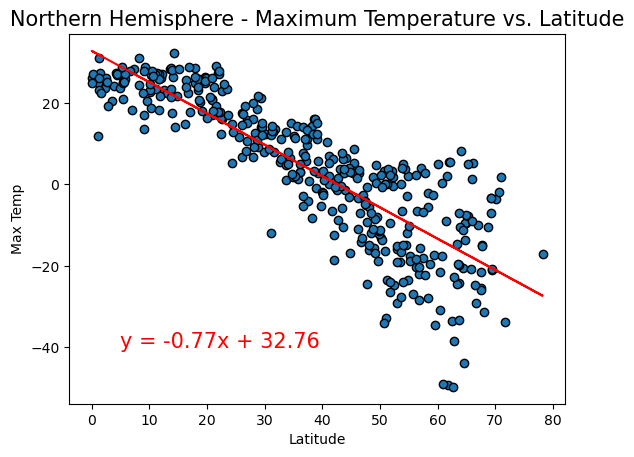

In [72]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values, marker='o', edgecolor='black')
plt.plot(x_values,regress_values,'r-')

# Graph properties
plt.title('Northern Hemisphere - Maximum Temperature vs. Latitude', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(5,-40),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.32282646521831554


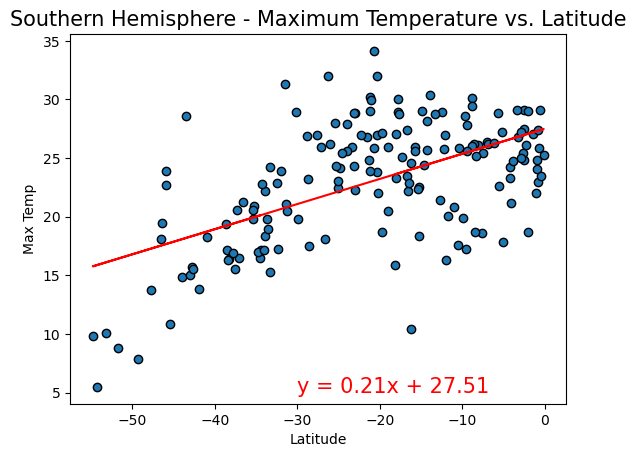

In [73]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create the plot
plt.scatter(x_values,y_values, marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")

# Graph properties
plt.title('Southern Hemisphere - Maximum Temperature vs. Latitude', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** North Hemisphere was having more Maximum Temperature than Southern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15406634659947901


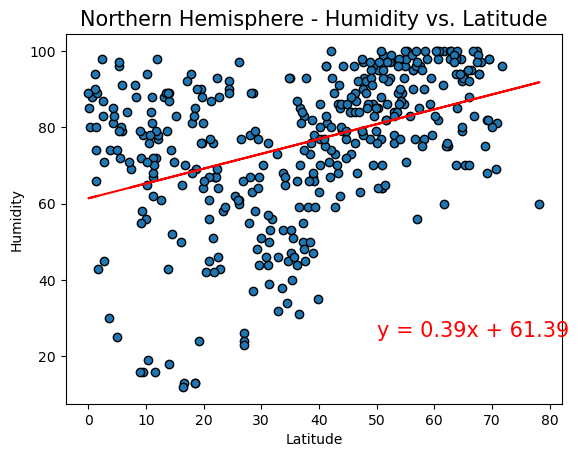

In [74]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create the plot
plt.scatter(x_values,y_values, marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")

# Graph properties
plt.title('Northern Hemisphere - Humidity vs. Latitude', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,25),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.06831651599243979


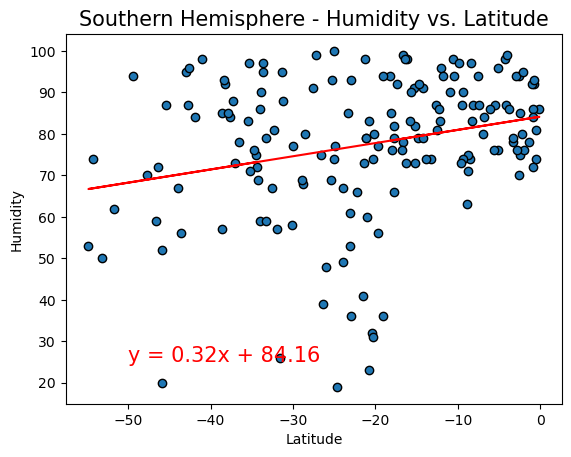

In [75]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create the plot
plt.scatter(x_values,y_values, marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")

# Graph properties
plt.title('Southern Hemisphere - Humidity vs. Latitude', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Humidity is more in North Hemisphere than South Hemisphere 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09868726185396139


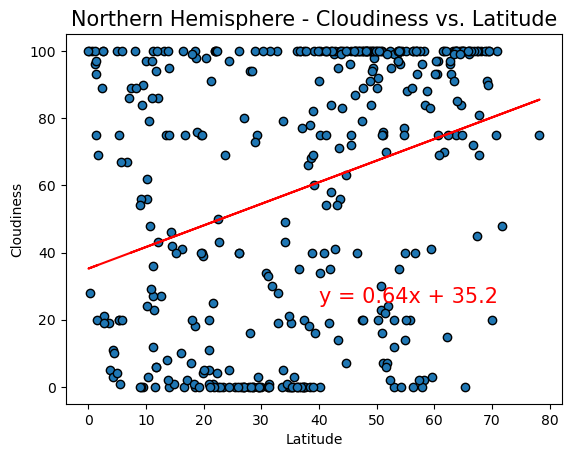

In [76]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create the plot
plt.scatter(x_values,y_values, marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")

# Graph properties
plt.title('Northern Hemisphere - Cloudiness vs. Latitude', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(40,25),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.026940329313384102


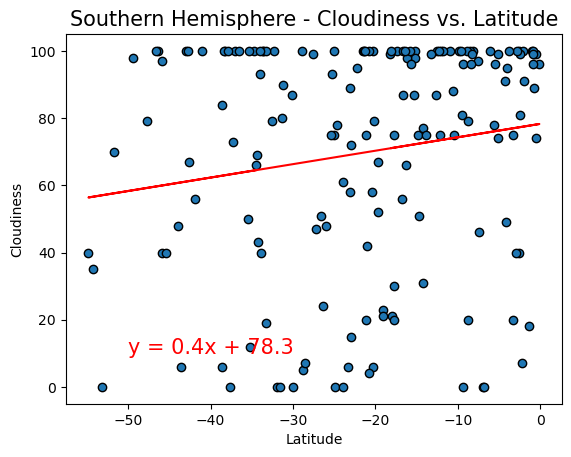

In [77]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create the plot
plt.scatter(x_values,y_values, marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")

# Graph properties
plt.title('Southern Hemisphere - Cloudiness vs. Latitude', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** Cloudiness is less spread out in southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003980825171021896


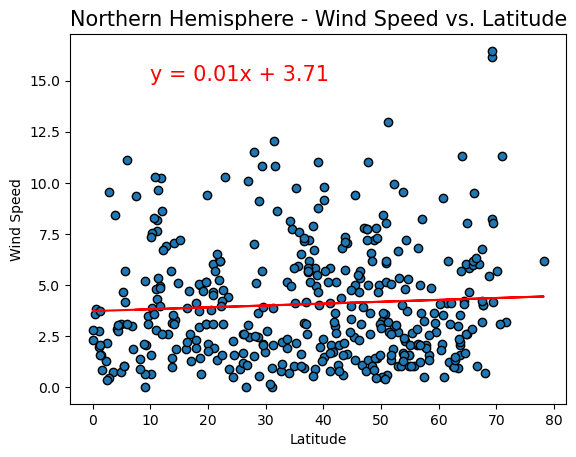

In [78]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create the plot
plt.scatter(x_values,y_values, marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")

# Graph properties
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(10,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.177303375312429


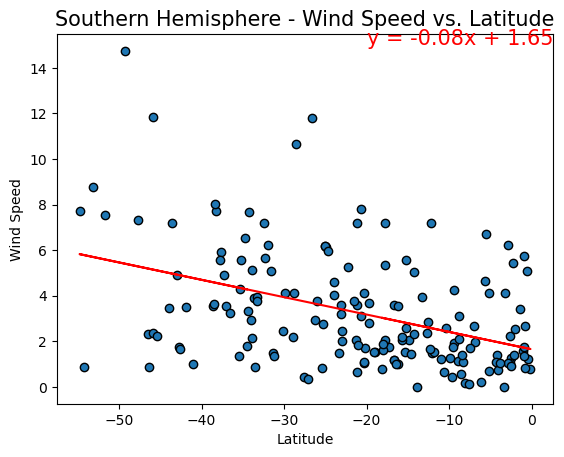

In [79]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create the plot
plt.scatter(x_values,y_values, marker='o', edgecolor='black')
plt.plot(x_values,regress_values,"r-")

# Graph properties
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** More wind spead in North Hemisphere